In [25]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
zoo = pd.read_csv("zoo.csv")
zoo.drop("animal_name",axis=1,inplace=True)

feature_names = ['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic',]
X = zoo[feature_names]
y = zoo['class_type']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.2, test_size=.8)

clf = DecisionTreeClassifier(criterion="entropy").fit(X_train, y_train)

pred = clf.predict(X_test)
print('Accuracy of classifier on test set: {:.2f}' .format(clf.score(X_test, y_test)))
class_names=["class 1", "class 2", "class 3", "class 4", "class 5", "class 6", "class 7"]
print(classification_report(y_test, pred))
print(confusion_matrix(y_test,pred))


Accuracy of classifier on test set: 0.88
              precision    recall  f1-score   support

           1       0.94      0.97      0.96        33
           2       0.89      1.00      0.94        17
           3       0.00      0.00      0.00         5
           4       1.00      1.00      1.00        11
           5       0.40      1.00      0.57         2
           6       0.57      1.00      0.73         4
           7       1.00      0.56      0.71         9

    accuracy                           0.88        81
   macro avg       0.69      0.79      0.70        81
weighted avg       0.86      0.88      0.85        81

[[32  1  0  0  0  0  0]
 [ 0 17  0  0  0  0  0]
 [ 1  1  0  0  3  0  0]
 [ 0  0  0 11  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  4  0]
 [ 1  0  0  0  0  3  5]]


/home/admn/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admn/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admn/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


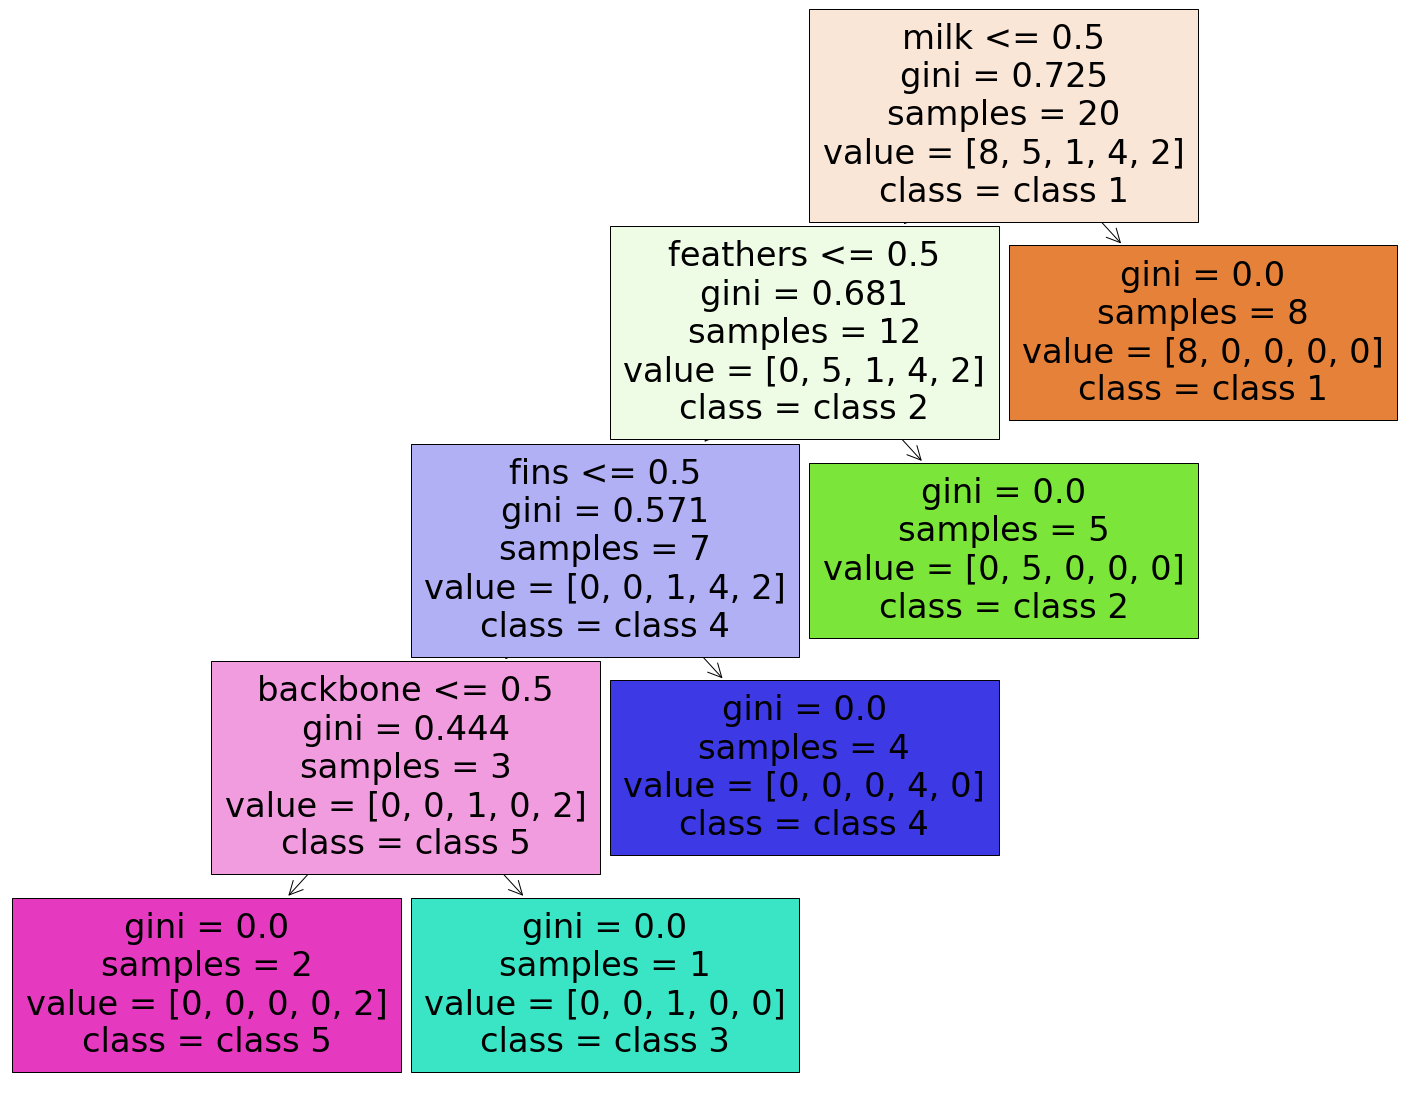

In [18]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

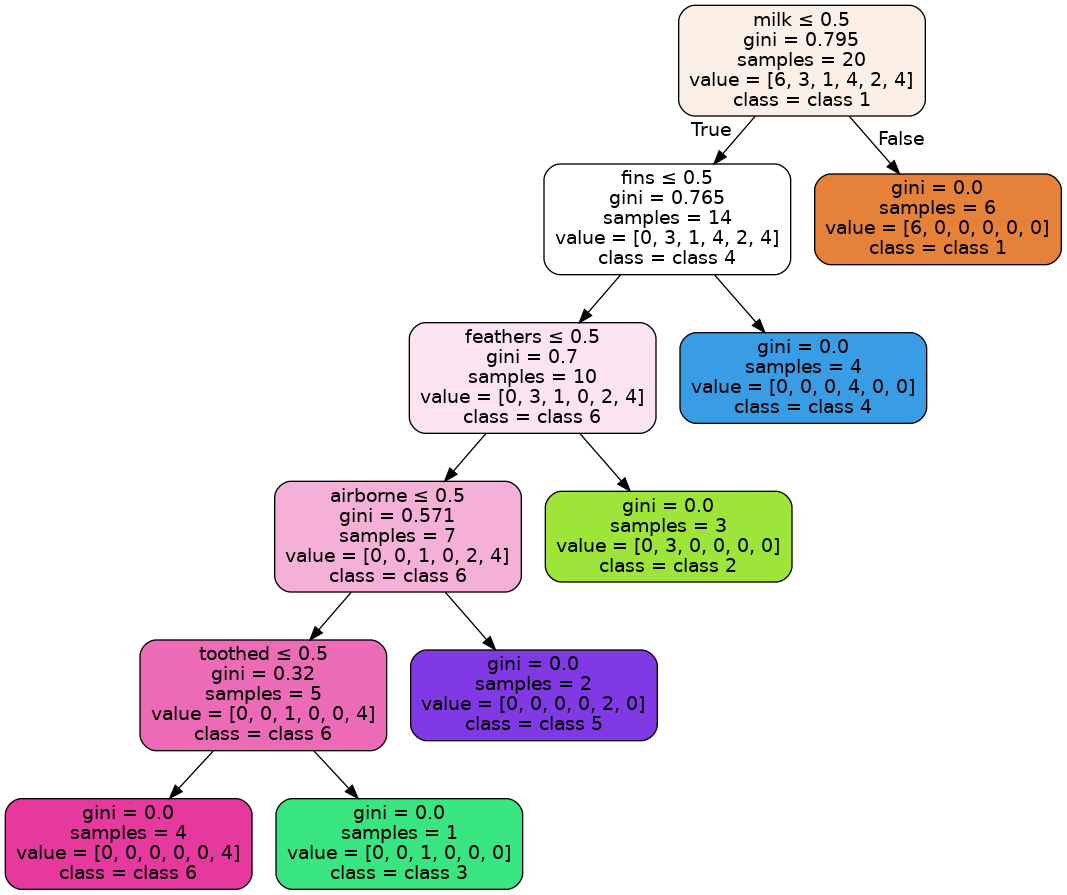

In [23]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())